<a href="https://colab.research.google.com/github/Rjlee22/Personal-Projects/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**❤️‍🩹Heart Attack | Analysis & Prediction**

This dataset provides medical information relevant to heart attack prediction. It includes the following features:

Age: Age of the person 👤

Sex: Gender of the person 👨/👩

CP: Chest pain type 💥

TRTBPS: Resting blood pressure (in mm Hg) 💉

Chol: Cholesterol level (mg/dl) 🩸

FBS: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 🍬

Restecg: Resting electrocardiographic results 📈

Thalachh: Maximum heart rate achieved 💓

Exng: Exercise-induced angina (1 = yes; 0 = no) 🚴‍♂️

Oldpeak: Previous peak ⛰️

SLP: Slope of the peak exercise segment 📐

CAA: Number of major vessels (0-3) 🩺

Thall: Thalassemia rate 🧬

Output: Target variable indicating heart attack risk ⚠️

📦 Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score

warnings.filterwarnings('ignore')

📂 Loading & 👀 Exploring Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [7]:
df.duplicated().sum()

1

In [8]:
categorical_features = []
continuous_features = []
target_feature = ["output"]

for i in df.columns[:-1]:
    if len(df[i].unique())<10:
        categorical_features.append(i)
    else:
        continuous_features.append(i)

print("The categorial features are : ", categorical_features)
print("The continuous features are : ", continuous_features)
print("The target variable is :  ", target_feature)

The categorial features are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continuous features are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [9]:
for feature in continuous_features:

    fig = px.violin(df, x='output', y=f'{feature}', color='output', box=True, points='all',
                    title=f'Impact of {feature} on Heart Attack')
    fig.update_layout(width=800, height=400, title={'x': 0.5})
    fig.show()

In [10]:
correlation_matrix = df.corr()

fig = px.imshow(
    correlation_matrix, x=correlation_matrix.columns,  y=correlation_matrix.columns,
    title='Correlation Heatmap', color_continuous_scale='oranges')

fig.update_layout(
    title={'x': 0.5},
    width=900, height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_title='Features',
    yaxis_title='Features',
    title_text='Correlation Heatmap',
    showlegend=False,
    font_size=14)

fig.show()

🔄 Data Preprocessing

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

🧠 Model Training

In [14]:
def Model_Training_And_Evaluation(Classifier):
    # Initialize the classifier and fit it to the training data
    model = Classifier
    model.fit(X_train, y_train)

    # Predict the test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Create the first figure with performance indicators
    fig = make_subplots(rows=1, cols=4, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])

    # Accuracy gauge
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=round(accuracy * 100, 2),
        title={'text': "Accuracy", 'font': {'size': 14}},
        gauge={'axis': {'range': [None, 100]}}
    ), row=1, col=1)

    # Precision gauge
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=round(precision * 100, 2),
        title={'text': "Precision", 'font': {'size': 14}},
        gauge={'axis': {'range': [None, 100]}}
    ), row=1, col=2)

    # Recall gauge
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=round(recall * 100, 2),
        title={'text': "Recall", 'font': {'size': 14}},
        gauge={'axis': {'range': [None, 100]}}
    ), row=1, col=3)

    # F1 Score gauge
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=round(f1 * 100, 2),
        title={'text': "F1 Score", 'font': {'size': 14}},
        gauge={'axis': {'range': [None, 100]}}
    ), row=1, col=4)

    # 🎨 Updating the Layout
    fig.update_layout(
        title_text="🎯 Model Performance Metrics",
        title_x=0.5,
        height=250,
        width=1000,
        showlegend=False,
    )

    fig.show()

    # Plot the Confusion Matrix and ROC Curve
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the Confusion Matrix on the first subplot
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0], annot_kws={"size": 16})
    axs[0].set_title('Confusion Matrix', fontsize=18)
    axs[0].set_ylabel('Actual', fontsize=14)
    axs[0].set_xlabel('Predicted', fontsize=14)
    axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=12)
    axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=12)

    # Plot the ROC Curve on the second subplot
    axs[1].plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
    axs[1].plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    axs[1].set_xlim([0.0, 1.0])
    axs[1].set_ylim([0.0, 1.0])
    axs[1].set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
    axs[1].set_xlabel('False Positive Rate', fontsize=14)
    axs[1].set_ylabel('True Positive Rate', fontsize=14)
    axs[1].legend(loc='lower right', fontsize=12)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

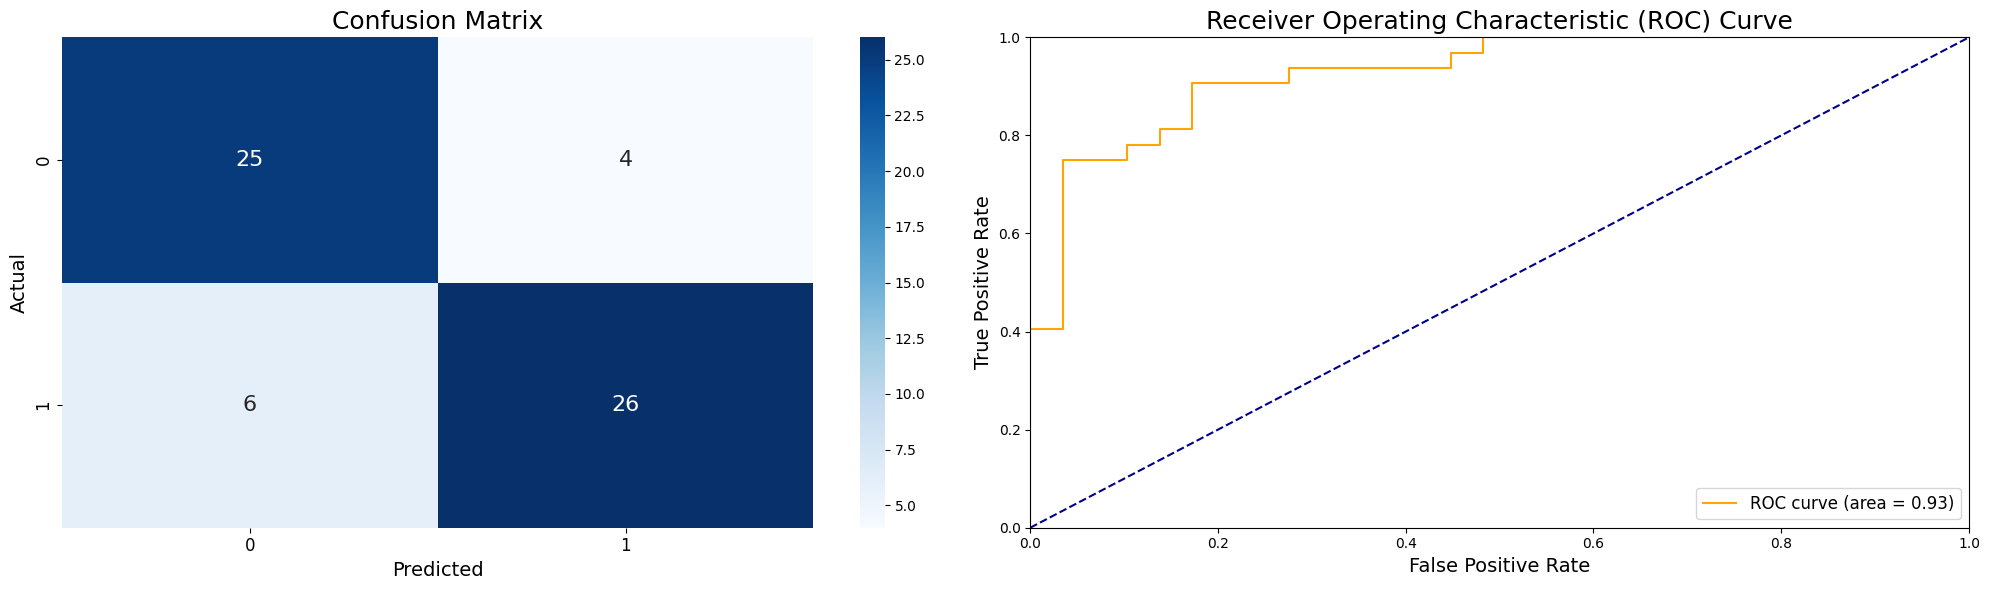

In [15]:
Model_Training_And_Evaluation(LogisticRegression())

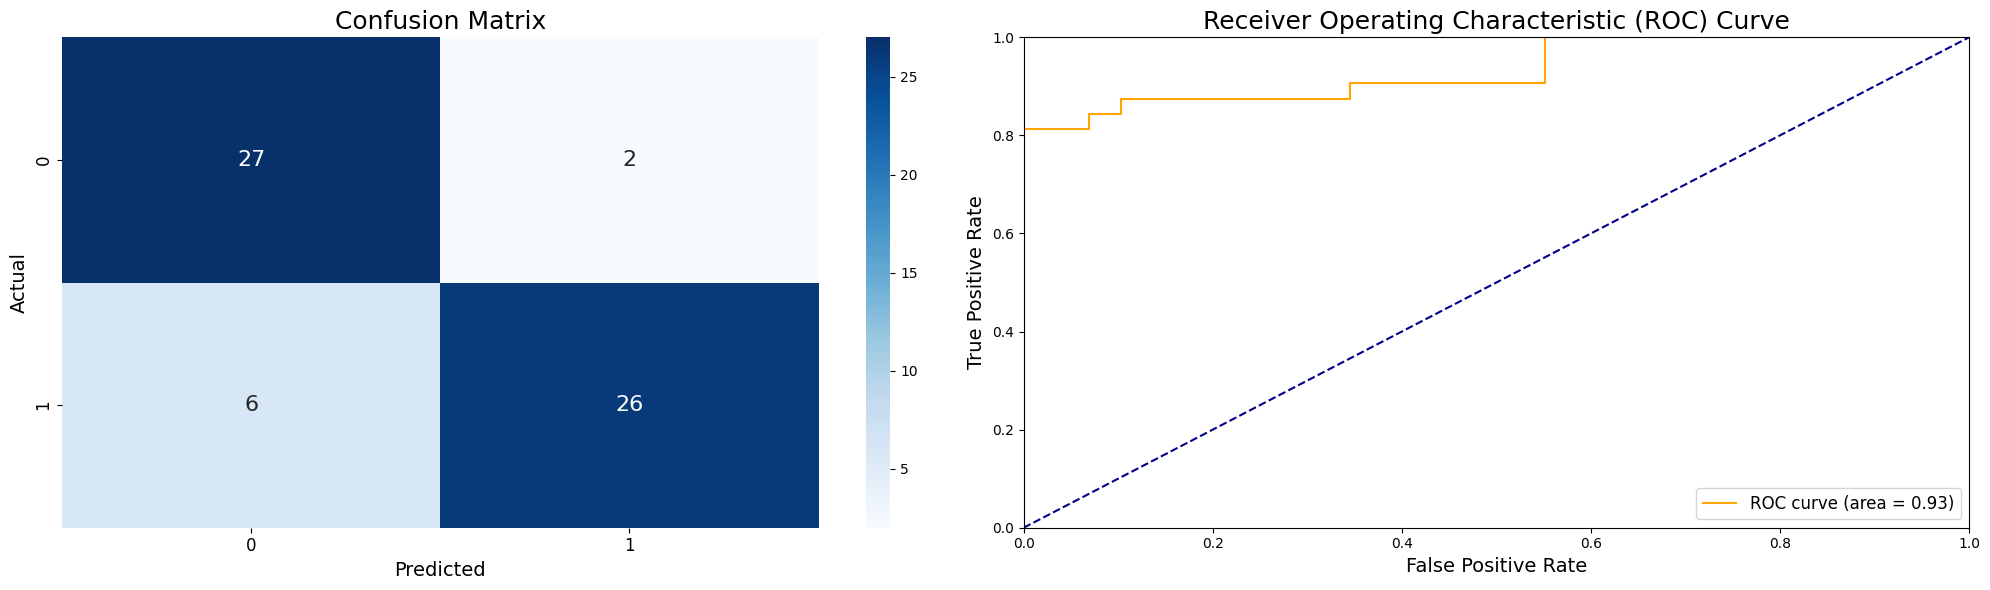

In [16]:
Model_Training_And_Evaluation(SVC(probability=True))

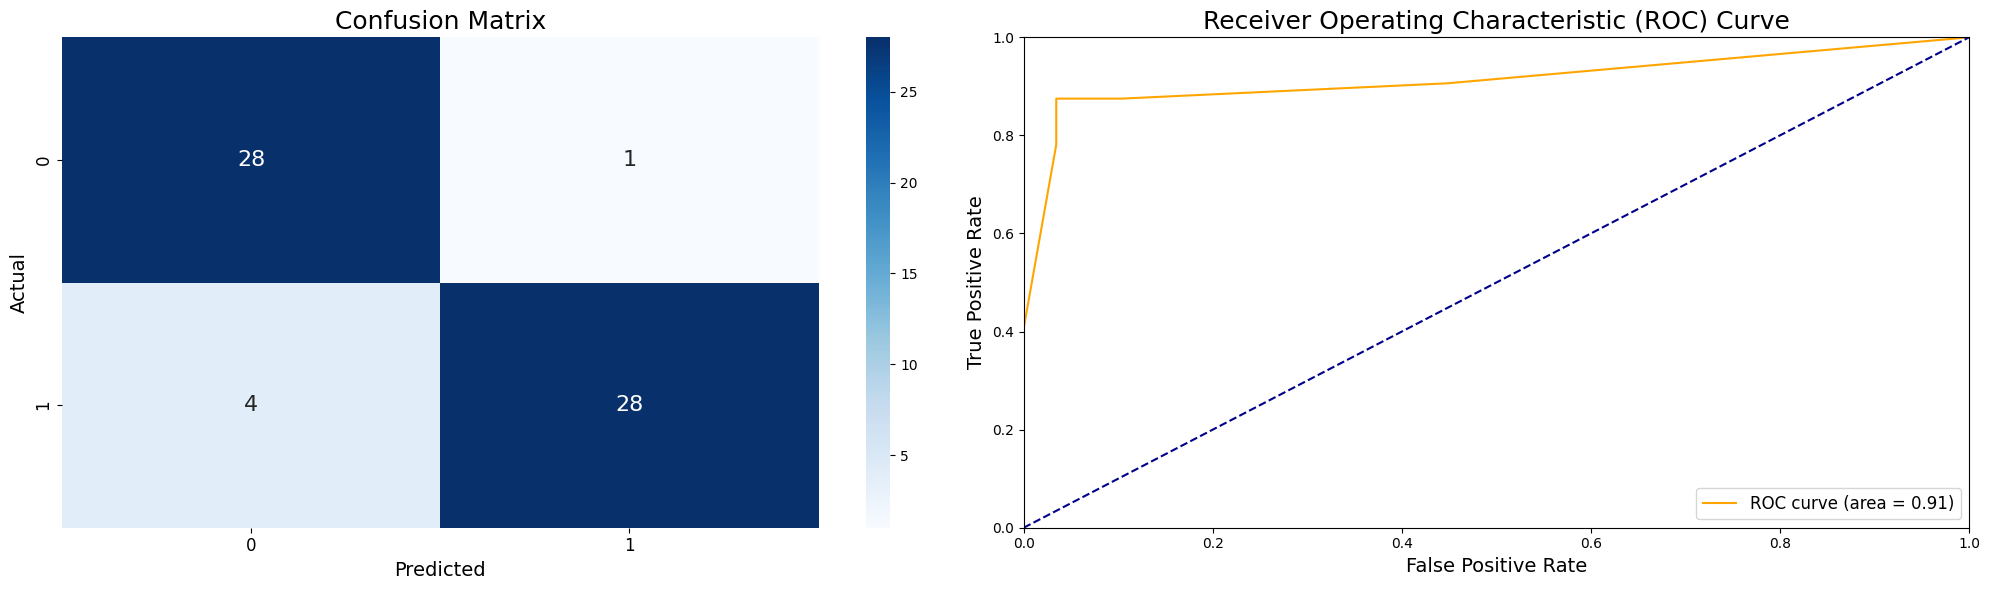

In [17]:
Model_Training_And_Evaluation(KNeighborsClassifier())

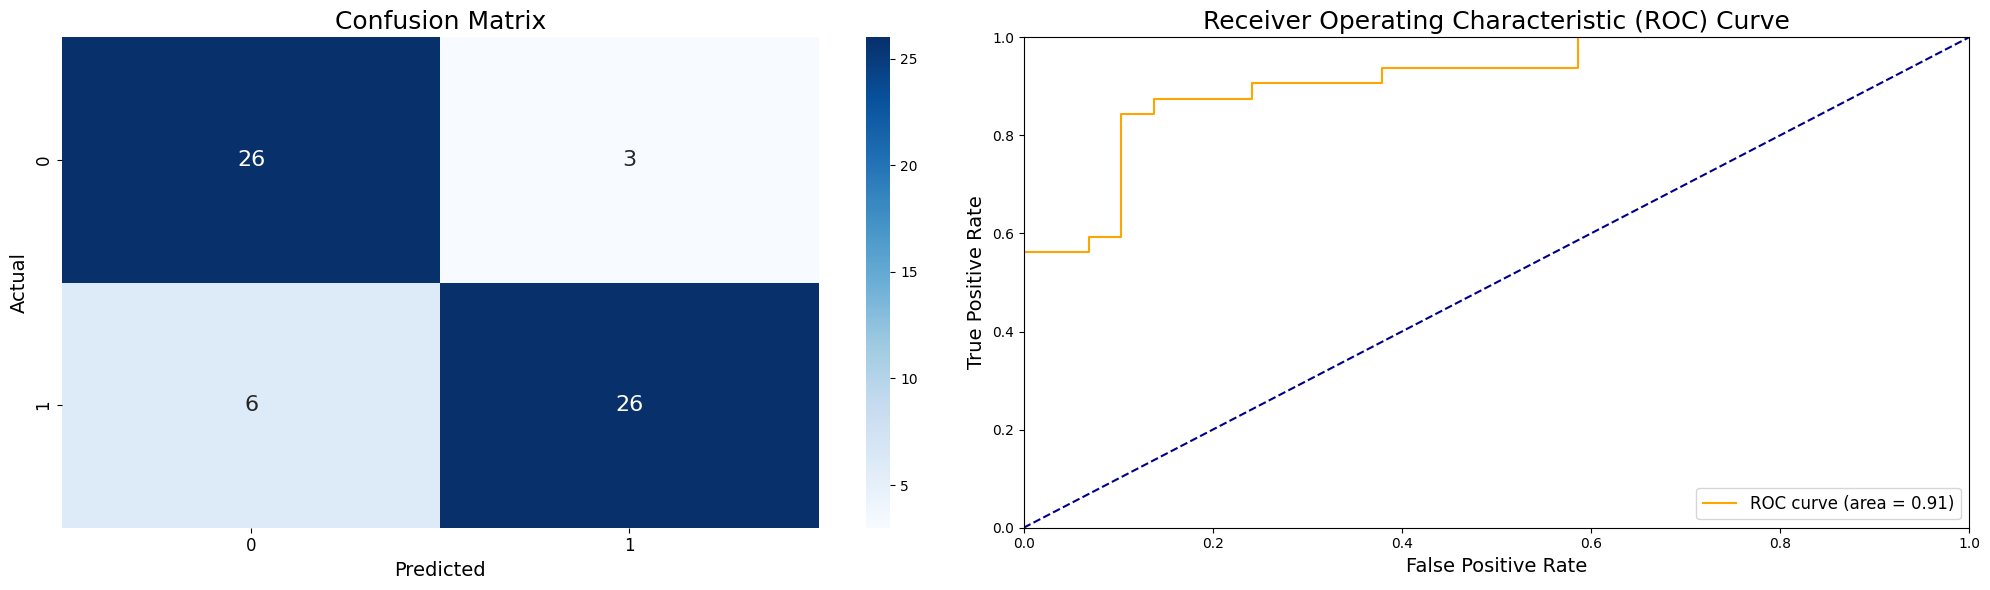

In [18]:
Model_Training_And_Evaluation(GradientBoostingClassifier())

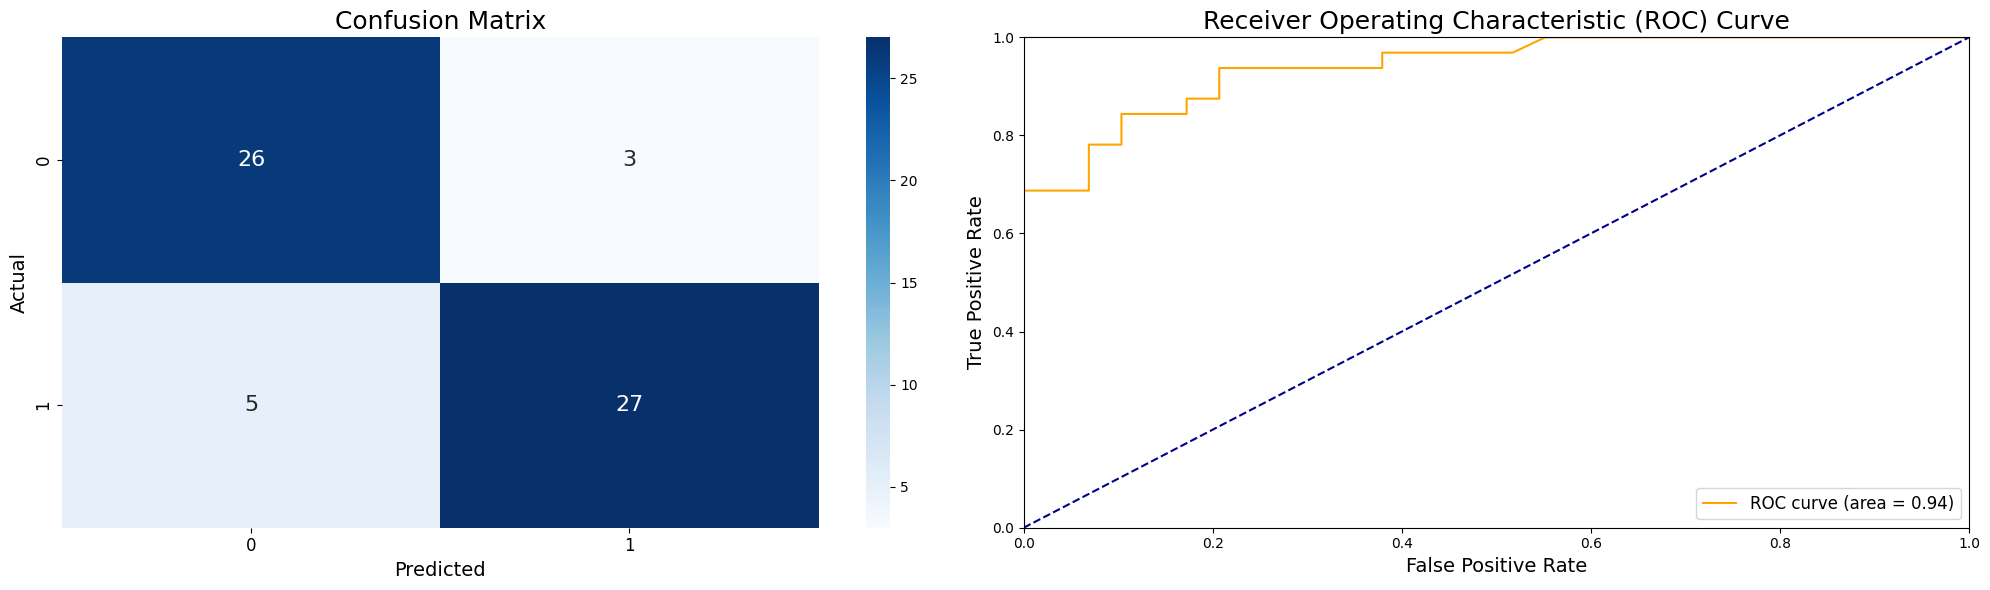

In [19]:
Model_Training_And_Evaluation(RandomForestClassifier())

Epoch [1/30], Loss: 0.6880
Epoch [2/30], Loss: 0.6830
Epoch [3/30], Loss: 0.6781
Epoch [4/30], Loss: 0.6732
Epoch [5/30], Loss: 0.6682
Epoch [6/30], Loss: 0.6632
Epoch [7/30], Loss: 0.6582
Epoch [8/30], Loss: 0.6531
Epoch [9/30], Loss: 0.6479
Epoch [10/30], Loss: 0.6427
Epoch [11/30], Loss: 0.6374
Epoch [12/30], Loss: 0.6320
Epoch [13/30], Loss: 0.6265
Epoch [14/30], Loss: 0.6209
Epoch [15/30], Loss: 0.6152
Epoch [16/30], Loss: 0.6094
Epoch [17/30], Loss: 0.6035
Epoch [18/30], Loss: 0.5974
Epoch [19/30], Loss: 0.5912
Epoch [20/30], Loss: 0.5848
Epoch [21/30], Loss: 0.5784
Epoch [22/30], Loss: 0.5718
Epoch [23/30], Loss: 0.5652
Epoch [24/30], Loss: 0.5584
Epoch [25/30], Loss: 0.5517
Epoch [26/30], Loss: 0.5448
Epoch [27/30], Loss: 0.5379
Epoch [28/30], Loss: 0.5309
Epoch [29/30], Loss: 0.5239
Epoch [30/30], Loss: 0.5169


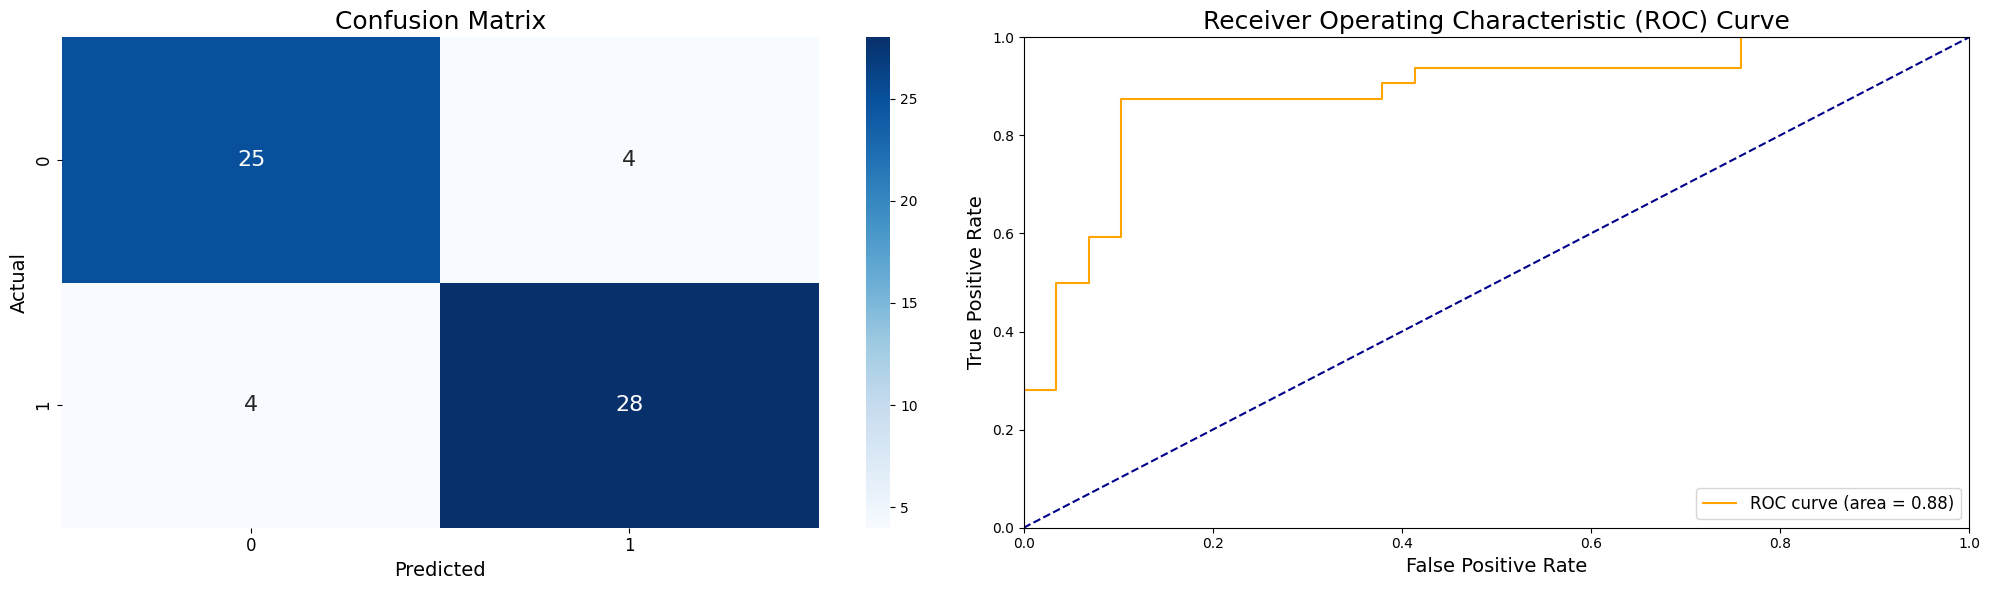

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc4(x))
        return x
# converting data to tensors
def Model_Training_And_Evaluation(X_train, X_test, y_train, y_test):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Initializing the model, loss function, and optimizer
    input_size = X_train.shape[1]
    model = SimpleNN(input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
    model.train()
    epochs = 30
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
    model.eval()
    with torch.no_grad():
        y_pred_prob = model(X_test_tensor).numpy().flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

# Calculating performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

# Creating the first figure with performance indicators
    fig = make_subplots(rows=1, cols=4, specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}, {"type": "domain"}]])

    # Accuracy gauge
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=round(accuracy * 100, 2),
        title={'text': "Accuracy", 'font': {'size': 14}},
        gauge={'axis': {'range': [None, 100]}}
    ), row=1, col=1)

    # Precision gauge
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=round(precision * 100, 2),
        title={'text': "Precision", 'font': {'size': 14}},
        gauge={'axis': {'range': [None, 100]}}
    ), row=1, col=2)

    # Recall gauge
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=round(recall * 100, 2),
        title={'text': "Recall", 'font': {'size': 14}},
        gauge={'axis': {'range': [None, 100]}}
    ), row=1, col=3)

    # F1 Score gauge
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=round(f1 * 100, 2),
        title={'text': "F1 Score", 'font': {'size': 14}},
        gauge={'axis': {'range': [None, 100]}}
    ), row=1, col=4)

    fig.update_layout(
        title_text="Model Performance Metrics",
        title_x=0.5,
        height=250,
        width=1000,
        showlegend=False,
    )

    fig.show()

# Plotting the Confusion Matrix and ROC Curve
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0], annot_kws={"size": 16})
    axs[0].set_title('Confusion Matrix', fontsize=18)
    axs[0].set_ylabel('Actual', fontsize=14)
    axs[0].set_xlabel('Predicted', fontsize=14)
    axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=12)
    axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=12)

    axs[1].plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
    axs[1].plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    axs[1].set_xlim([0.0, 1.0])
    axs[1].set_ylim([0.0, 1.0])
    axs[1].set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
    axs[1].set_xlabel('False Positive Rate', fontsize=14)
    axs[1].set_ylabel('True Positive Rate', fontsize=14)
    axs[1].legend(loc='lower right', fontsize=12)

    plt.tight_layout()
    plt.show()

Model_Training_And_Evaluation(X_train, X_test, y_train, y_test)


🏁 Conclusion

The KNN model stands out for heart attack prediction with its impressive performance metrics. Its high accuracy, precision, recall, and F1 Score demonstrate its effectiveness in identifying heart attack cases while minimizing false positives. This makes it a strong choice for reliable and balanced predictions in medical diagnostics. 🩺💓

Performance Metrics
Accuracy (91.8%): The model correctly predicts heart attack outcomes 91.8% of the time. High accuracy is a strong indicator of overall model performance.

Precision (96.6%): When the model predicts a heart attack, it is correct 96.6% of the time. This high precision minimizes false positives, which is important in avoiding unnecessary concern or tests.

Recall (87.5%): The model identifies 87.5% of actual heart attack cases. High recall ensures that most heart attack cases are detected, reducing the risk of missed diagnoses.

F1 Score (91.8%): This score reflects a good balance between precision and recall, indicating that the model performs well in both aspects.

Other than the KNN model, both the Neural Network and the RandomForest classifier did the second best, with an accuracy score of 86.9%. One thing to note is that this dataset is very small and contains orderly data. If we were to do this process again with a similiar but more complex dataset, it would be interesting to see if the NN or the RF would perform better than the KNN model.